In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from constant import HEADER_NAME, COLUMNS_TO_DROP

In [2]:
m7 = pd.read_csv('set7m_12monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)
c7 = pd.read_csv('set7c_14monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)
cr7 = pd.read_csv('set7cr_100monthly_data_0.txt', index_col=False, names=HEADER_NAME, sep='\t').drop(columns=COLUMNS_TO_DROP)

In [3]:
def calcl_si_val(nparray):
  log = np.log(nparray)
  log[log == np.NINF] = 0
  si = -np.sum(nparray*log)
  mysum = np.sum(nparray)
  assert round(mysum) == 1
  return si

In [4]:
si_calc_time = list(range(120,360,30))

In [5]:
si_mft = []
si_cyc = []
si_cyc_rev = []

for i in si_calc_time:
  si_mft.append(calcl_si_val(m7.iloc[i,:].values))
  si_cyc.append(calcl_si_val(c7.iloc[i,:].values))
  si_cyc_rev.append(calcl_si_val(cr7.iloc[i,:].values))

<ipython-input-3-7c45e5438851>:2: RuntimeWarning: divide by zero encountered in log
  log = np.log(nparray)


Plot

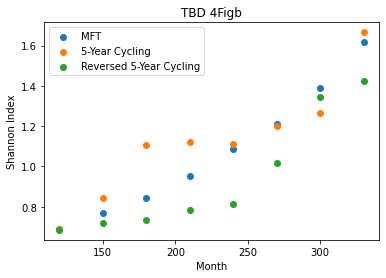

In [6]:
plt.scatter(si_calc_time, si_mft, label='MFT')
plt.scatter(si_calc_time, si_cyc, label='5-Year Cycling')
plt.scatter(si_calc_time, si_cyc_rev, label='Reversed 5-Year Cycling')
plt.title('TBD 4Figb')
plt.xlabel('Month')
plt.ylabel('Shannon Index')
plt.legend()

Print out

**Note:** the reported times are:
- end of burn in, year #0 (#10 if not calibrated)
- year #2.5 ✓
- year #5
- year #7.5 ✓
- year #10
- year #12.5 ✓
- year #15
- year #17.5 ✓
- year #20

In [7]:
print('---MFT---')
for i in range(120,360,30):
  print(calcl_si_val(m7.iloc[i,:].values))

---MFT---
0.6896578300955778
0.7690500229863549
0.845121818957915
0.9535949030107521
1.0869606931254459
1.2095830335959645
1.3872586547237806
1.6195774628896014


<ipython-input-3-7c45e5438851>:2: RuntimeWarning: divide by zero encountered in log
  log = np.log(nparray)


In [8]:
print('---Cyc---')
for i in range(120,360,30):
  print(calcl_si_val(c7.iloc[i,:].values))

---Cyc---
0.6876487190042615
0.8415180730975254
1.105388148046774
1.119614827427986
1.1112047879898503
1.2028179354152693
1.2648277372694614
1.6662205267778158


<ipython-input-3-7c45e5438851>:2: RuntimeWarning: divide by zero encountered in log
  log = np.log(nparray)


In [9]:
print('---Cyc Reversed---')
for i in range(120,360,30):
  print(calcl_si_val(cr7.iloc[i,:].values))

---Cyc Reversed---
0.6850958095214787
0.7188652741070309
0.7343761155818735
0.7849917947743339
0.8140964729128505
1.017645728191027
1.346493764923885
1.4218678194755354


<ipython-input-3-7c45e5438851>:2: RuntimeWarning: divide by zero encountered in log
  log = np.log(nparray)
